# Exercises:
##### Exercise 3.1: "Pi calculation using Monte Carlo method"
* Implement the calculation of the irrational number Pi using the Monte Carlo method
* Use Python multiprocessing to gain access to multiple processes
* Show the result for increasing number of random realizations
* Measure the execution time and observe the speedup when increasing the number of processors

In [1]:
# Importing libraries
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from typing import Union
import numpy as np
import timeit
import time

# Monte Carlo Method Implementation
def monte_carlo(n):
    print(x := np.random.rand(n,2))
    return x
# Generate points
def generate_points():
    return (np.random.rand(), np.random.rand())

def in_circle(points):
    d = np.sqrt(np.sum(points**2, axis=1))
    in_c = d <= 1
    return in_c

In [2]:
## Generate points
#np.random.seed(10)
#points = generate_points(10)

## Check if points are inside circle
#in_c = in_circle(points)
#inside_c = points[in_c]
#not_inside_c = points[~in_c]

#print("Points inside the unit circle:\n", inside_c)
#print("Points outside the unit circle:\n", not_inside_c)

## Generate angles from 0 to 2*pi
#angles = np.linspace(0, 2 * np.pi, 100)

## Generate x and y coordinates of points on the unit circle
#x = np.cos(angles)
#y = np.sin(angles)

## Plot the unit circle
##plt.figure(figsize=(6,6))
#plt.plot(x, y, color="black")
#plt.scatter(inside_c[:,0], inside_c[:,1], color="red")
#plt.scatter(not_inside_c[:,0], not_inside_c[:,1], color="blue")
#plt.title('Monte Carlo Method')
#plt.xlim(0, 1)  # Limit x-axis
#plt.ylim(0, 1)  # Limit y-axis
#plt.xlabel('x')
#plt.ylabel('y')
#plt.show()

Text(0.5, 1.0, 'Monte Carlo Method\nn: 100, π ≈ 3.36')

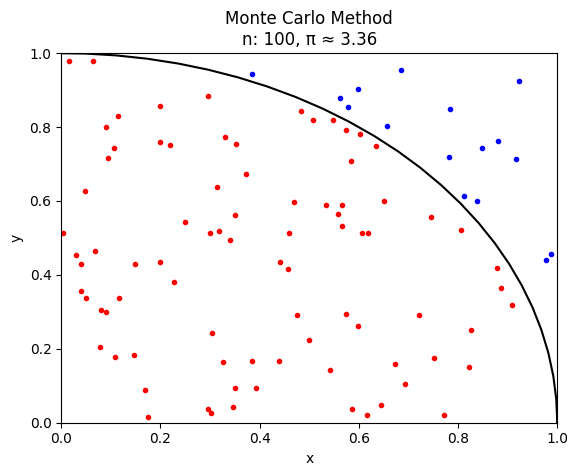

In [3]:
# Set random seed
np.random.seed(10)

# Initialize variables
points_inside_circle = 0
points_generated = 0
points = []
n = 100

# Generate angles from 0 to 2*pi
angles = np.linspace(0, 2 * np.pi, 100)

# Generate x and y coordinates of points on the unit circle
x = np.cos(angles)
y = np.sin(angles)

# Plot the unit circle
plt.plot(x, y, color="black")
plt.xlim(0, 1)  # Limit x-axis
plt.ylim(0, 1)  # Limit y-axis
plt.xlabel('x')
plt.ylabel('y')

for i in range(n):
    point = generate_points()
    points.append(point)
    #print(point)
    d = np.sqrt(point[0]**2 + point[1]**2)
    #print(d)
    if d <= 1:
        points_inside_circle += 1
        plt.scatter(point[0], point[1], color="red", marker=".")
    else:
        plt.scatter(point[0], point[1], color="blue", marker=".")
    points_generated += 1
    
    pi_est = 4 * (points_inside_circle / points_generated)
plt.title(f'Monte Carlo Method\nn: {i + 1}, π ≈ {pi_est}')
    

In [1]:
# -*- coding: utf-8 -*-
import time
import multiprocessing as mp
import numpy as np


# this function returns the number of times the point fell
# within the unit circle out of n attempts
def in_circle(n):
    coords = np.random.rand(n,2) # random coordinates in (n,2) array
    count = 0
    for i in range(n):
        if (coords[i][0])**2 + (coords[i][1])**2 < 1:
            count += 1
    return count


# 'main' function
if __name__ == '__main__':
    P = 4     # number of processes run in parallel
    L = 100 # size of one chunk of work
    N = 10  # number of chunks

    np.random.seed(42)
    pool = mp.Pool(processes=P)
    
    start = time.time()
    
    # we apply the in_circle function N times and
    # the mp package takes care of "feeding" them to the processes
    results = [pool.apply_async(in_circle, (L,)) for i in range(N)]
    
    # we close the pool and wait for the results
    pool.close()
    pool.join()

    # here we get the K values one by one
    K_values = [result.get() for result in results]

    # ...and estimate the pi by aggregating all the attempts
    pi_n = [4*K_value*(1/L) for K_value in K_values]    
    pi_estimate = sum(pi_n)*(1/N)
    
    stop = time.time()
    run_time = stop - start
    
    print(pi_estimate)
    print(run_time)
